[캐글 유령잡기!](https://www.kaggle.com/competitions/ghouls-goblins-and-ghosts-boo/overview)

## 라이브러리 및 파일 로드

코랩

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import koreanize_matplotlib

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

In [4]:
train = pd.read_csv("/gdrive/My Drive/data/mini5/train.csv.zip")
test = pd.read_csv("/gdrive/My Drive/data/mini5/test.csv.zip")
submission = pd.read_csv("/gdrive/My Drive/data/mini5/sample_submission.csv.zip")

train.shape, test.shape, submission.shape

((371, 7), (529, 6), (529, 2))

쥬피터

In [5]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# import koreanize_matplotlib

In [6]:
# from glob import glob
# glob('data/*.zip')

In [7]:
# base_path = 'data'
# train = pd.read_csv(f"{base_path}/train.csv.zip")
# test = pd.read_csv(f"{base_path}/test.csv.zip")
# submission = pd.read_csv(f"{base_path}/sample_submission.csv.zip")

# train.shape, test.shape, submission.shape

In [8]:
set(train) - set(test)

{'type'}

## EDA 및 전처리
### 기본적인 사항 확인

In [9]:
# info
train.info()
print("=" * 40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             529 non-null    int64  
 1   bone_length    529 non-null    float64
 2   rotting_flesh  529 non-null    float64
 3   hair_length    529 non-null    float64
 4   has_soul       529 non-null    float64
 5   color          529 n

In [10]:
# 결측치 확인
print(train.isnull().sum())
print("=" * 40)
test.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64


id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
dtype: int64

데이터셋에 결측치가 없음을 확인하였다.

In [11]:
# 유일값 확인
print(train.nunique())
print("=" * 40)
print(test.nunique())

id               371
bone_length      371
rotting_flesh    371
hair_length      371
has_soul         371
color              6
type               3
dtype: int64
id               529
bone_length      529
rotting_flesh    529
hair_length      529
has_soul         529
color              6
dtype: int64


id는 삭제해주어도 무방할 것 같다. (또는 index 지정)

In [12]:
# 기술통계 확인
train.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [13]:
train.describe(include = "object")

,color,type
count,371,371
unique,6,3
top,white,Ghoul
freq,137,129


In [14]:
# 상관관계 확인
corr = train.corr()
corr

,id,bone_length,rotting_flesh,hair_length,has_soul
id,1.000000,-0.062759,-0.007539,0.076475,0.100054
bone_length,-0.062759,1.000000,-0.041716,0.353881,0.381675
rotting_flesh,-0.007539,-0.041716,1.000000,-0.220353,-0.132051
hair_length,0.076475,0.353881,-0.220353,1.000000,0.474835
has_soul,0.100054,0.381675,-0.132051,0.474835,1.000000


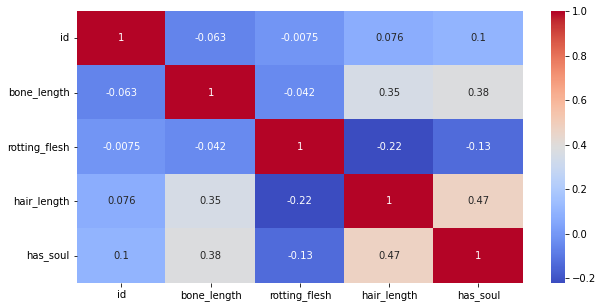

In [15]:
plt.figure(figsize = (10,5))
sns.heatmap(corr, cmap = "coolwarm", annot = True);

- hair_length와 has_soul은 중간 정도의 상관관계를 가지고 있으며
- hair_length와 bone_length, has_soul과 bone_length는 약한 상관관계를 가지고 있음

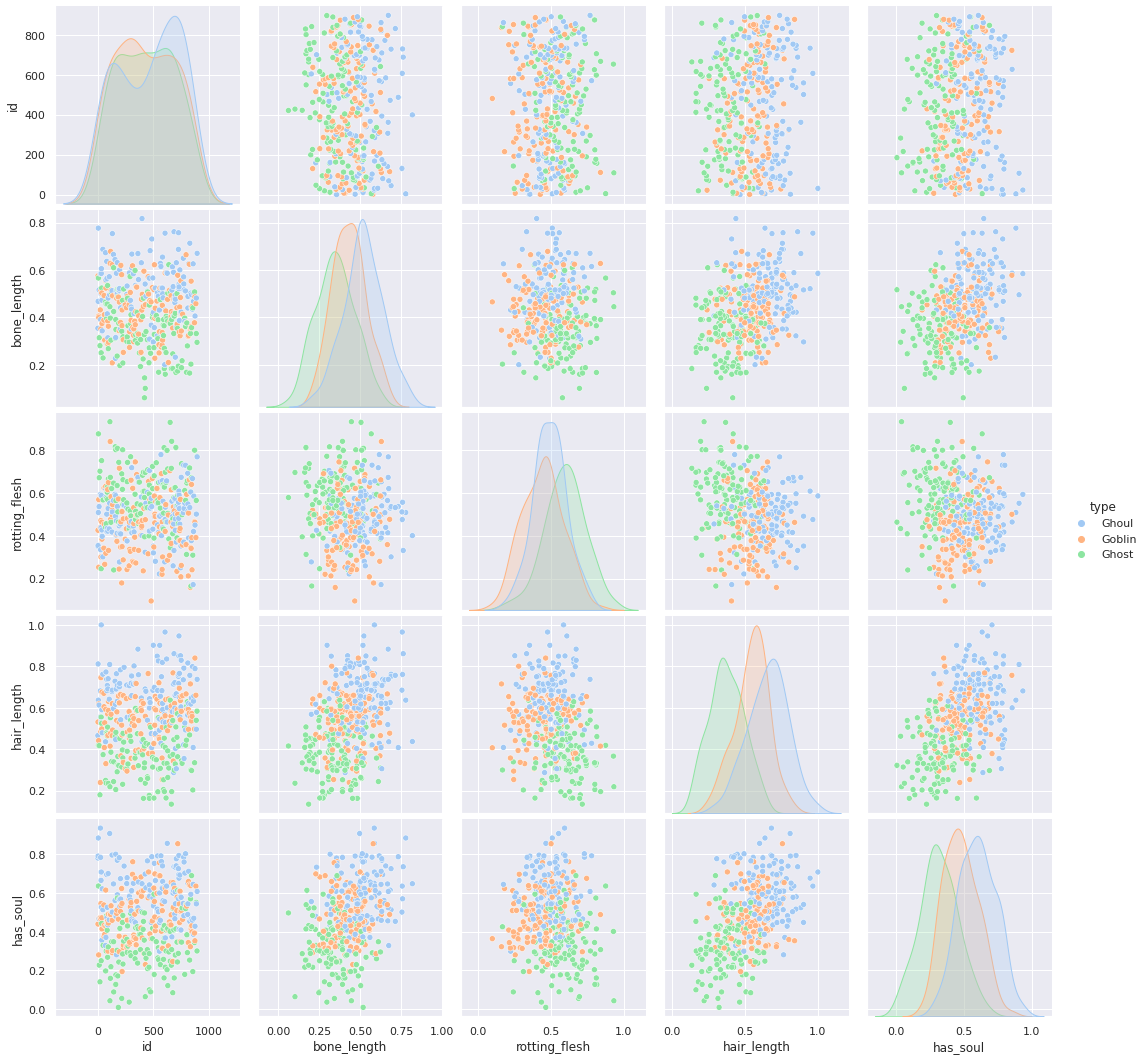

In [16]:
sns.set()
cols = train.columns[1:]
sns.pairplot(train,height = 3, hue="type", palette = "pastel")
plt.show()

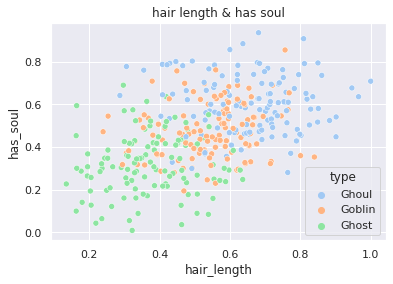

In [17]:
plt.title("hair length & has soul")
sns.scatterplot(data = train, x = "hair_length", y = "has_soul", hue = "type", palette = "pastel");

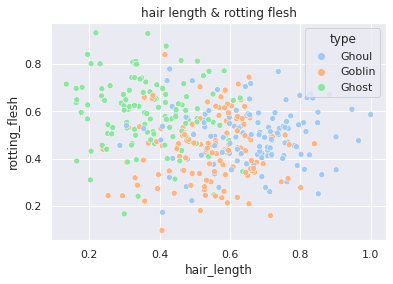

In [18]:
plt.title("hair length & rotting flesh")
sns.scatterplot(data = train, x = "hair_length", y = "rotting_flesh", hue = "type", palette = "pastel");

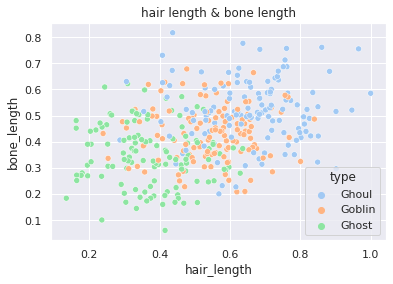

In [19]:
plt.title("hair length & bone length")
sns.scatterplot(data = train, x = "hair_length", y = "bone_length", hue = "type", palette = "pastel");

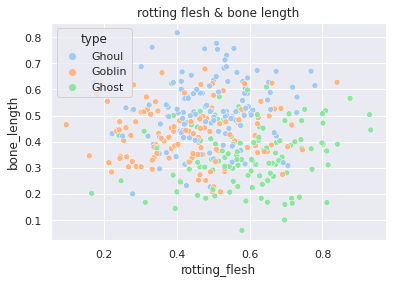

In [20]:
plt.title("rotting flesh & bone length")
sns.scatterplot(data = train, x = "rotting_flesh", y = "bone_length", hue = "type", palette = "pastel");

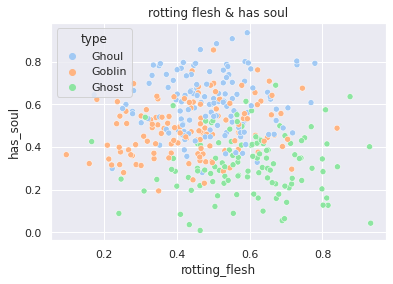

In [21]:
plt.title("rotting flesh & has soul")
sns.scatterplot(data = train, x = "rotting_flesh", y = "has_soul", hue = "type", palette = "pastel");

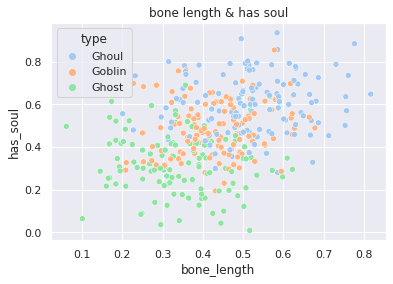

In [22]:
plt.title("bone length & has soul")
sns.scatterplot(data = train, x = "bone_length", y = "has_soul", hue = "type", palette = "pastel");

hair_length와 has_soul, hair_length와 bone_length, has_soul과 bone_length 의미가 있어보임

In [23]:
# 정답값의 분포 확인
train["type"].value_counts(1)

Ghoul     0.347709
Goblin    0.336927
Ghost     0.315364
Name: type, dtype: float64

train 데이터는 균형 데이터임을 확인할 수 있다.

### type 인코딩: 0-ghoul, 1-고블린, 2-고스트
type이 문자로 되어 있어서 숫자로 인코딩 해준다.

In [24]:
train["type"].unique()

array(['Ghoul', 'Goblin', 'Ghost'], dtype=object)

In [25]:
train.replace("Ghoul", 0, inplace = True)
train.replace("Goblin", 1, inplace = True)
train.replace("Ghost", 2, inplace = True)

### bone_length

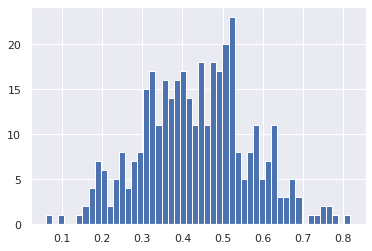

In [26]:
train["bone_length"].hist(bins = 50);

In [27]:
train["bone_length"].describe()

count    371.000000
mean       0.434160
std        0.132833
min        0.061032
25%        0.340006
50%        0.434891
75%        0.517223
max        0.817001
Name: bone_length, dtype: float64

In [28]:
# 이상치 확인하기
Q1 = train["bone_length"].describe()["25%"]
Q3 = train["bone_length"].describe()["75%"]
IQR = Q3 - Q1

print("작은 값")
display(train.loc[train["bone_length"] < Q1 - 1.5*IQR])

print("큰 값")
display(train.loc[train["bone_length"] > Q3 + 1.5*IQR])

작은 값


,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
174,421,0.061032,0.578567,0.41544,0.497098,black,2


큰 값


,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
166,399,0.817001,0.400808,0.437047,0.64823,green,0


In [29]:
train.groupby(by = "type")["bone_length"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,129.0,0.517159,0.120600,0.200753,0.439625,0.515397,0.590384,0.817001
1,125.0,0.429650,0.101917,0.208625,0.355313,0.430797,0.492438,0.678519
2,117.0,0.347466,0.117748,0.061032,0.269748,0.340442,0.417253,0.622371


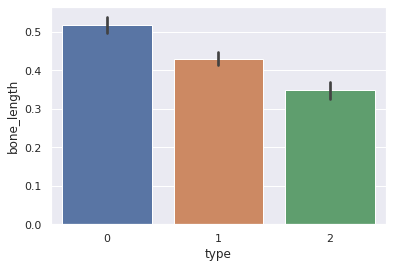

In [30]:
sns.barplot(data = train, x = "type", y = "bone_length")

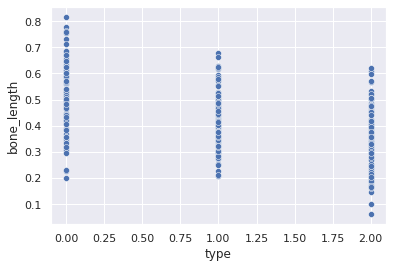

In [31]:
sns.scatterplot(data = train, x = "type", y = "bone_length")

### rotting flesh

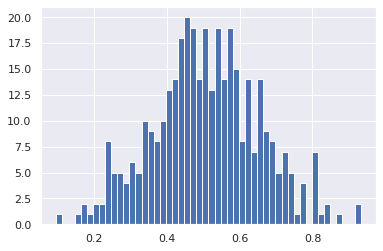

In [32]:
train["rotting_flesh"].hist(bins = 50);

In [33]:
train["rotting_flesh"].describe()

count    371.000000
mean       0.506848
std        0.146358
min        0.095687
25%        0.414812
50%        0.501552
75%        0.603977
max        0.932466
Name: rotting_flesh, dtype: float64

In [34]:
# 이상치 확인하기
Q1 = train["rotting_flesh"].describe()["25%"]
Q3 = train["rotting_flesh"].describe()["75%"]
IQR = Q3 - Q1

print("작은 값")
display(train.loc[train["rotting_flesh"] < Q1 - 1.5*IQR])

print("큰 값")
display(train.loc[train["rotting_flesh"] > Q3 + 1.5*IQR])

작은 값


,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
194,481,0.465423,0.095687,0.406791,0.364341,black,1


큰 값


,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
52,109,0.445132,0.932466,0.218732,0.043321,clear,2
266,653,0.503780,0.929440,0.366461,0.401567,blue,2


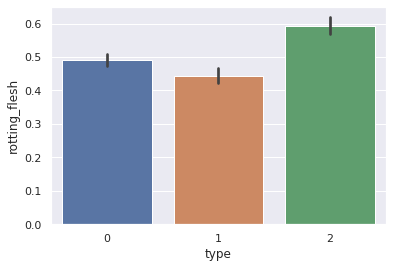

In [35]:
sns.barplot(data = train, x = "type", y = "rotting_flesh");

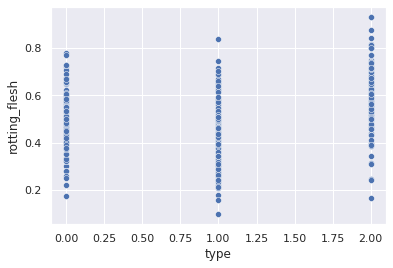

In [36]:
sns.scatterplot(data = train, x = "type", y = "rotting_flesh");

### hair_length

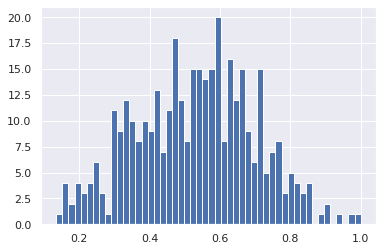

In [37]:
train["hair_length"].hist(bins = 50);

In [38]:
train["hair_length"].describe()

count    371.000000
mean       0.529114
std        0.169902
min        0.134600
25%        0.407428
50%        0.538642
75%        0.647244
max        1.000000
Name: hair_length, dtype: float64

In [39]:
# 이상치 확인하기
Q1 = train["hair_length"].describe()["25%"]
Q3 = train["hair_length"].describe()["75%"]
IQR = Q3 - Q1

print("작은 값")
display(train.loc[train["hair_length"] < Q1 - 1.5*IQR])

print("큰 값")
display(train.loc[train["hair_length"] > Q3 + 1.5*IQR])

작은 값


,id,bone_length,rotting_flesh,hair_length,has_soul,color,type


큰 값


,id,bone_length,rotting_flesh,hair_length,has_soul,color,type


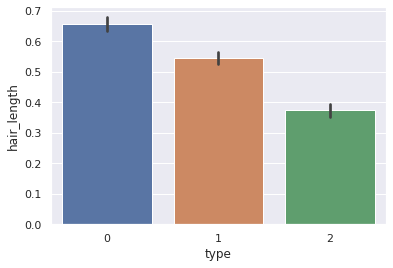

In [40]:
sns.barplot(data = train, x = "type", y = "hair_length");

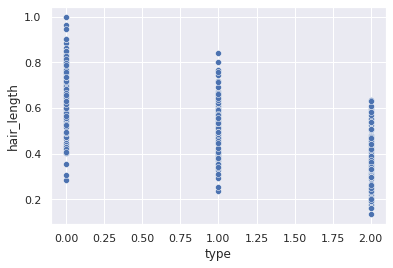

In [41]:
sns.scatterplot(data = train, x = "type", y = "hair_length");

In [42]:
# train["hair_length_class"] = train["hair_length"]
# train.loc[train["hair_length"] < 0.3 , "hair_length_class"] = 0
# train.loc[train["hair_length"] > 0.65 , "hair_length_class"] = 2
# train.loc[(train["hair_length"] >= 0.3) & (train["hair_length"] <= 0.65), "hair_length_class"] = 1

# train["hair_length_class"].value_counts(1)

In [43]:
# test["hair_length_class"] = test["hair_length"]
# test.loc[test["hair_length"] < 0.3 , "hair_length_class"] = 0
# test.loc[test["hair_length"] > 0.65 , "hair_length_class"] = 2
# test.loc[(test["hair_length"] >= 0.3) & (test["hair_length"] <= 0.65), "hair_length_class"] = 1

# test["hair_length_class"].value_counts(1)

### has_soul

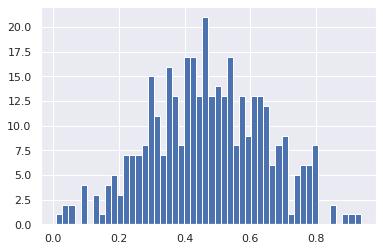

In [44]:
train["has_soul"].hist(bins = 50);

In [45]:
train["has_soul"].describe()

count    371.000000
mean       0.471392
std        0.176129
min        0.009402
25%        0.348002
50%        0.466372
75%        0.600610
max        0.935721
Name: has_soul, dtype: float64

In [46]:
# 이상치 확인하기
Q1 = train["has_soul"].describe()["25%"]
Q3 = train["has_soul"].describe()["75%"]
IQR = Q3 - Q1

print("작은 값")
display(train.loc[train["has_soul"] < Q1 - 1.5*IQR])

print("큰 값")
display(train.loc[train["has_soul"] > Q3 + 1.5*IQR])

작은 값


,id,bone_length,rotting_flesh,hair_length,has_soul,color,type


큰 값


,id,bone_length,rotting_flesh,hair_length,has_soul,color,type


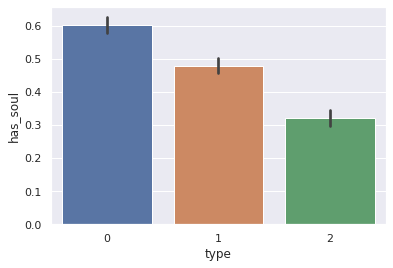

In [47]:
sns.barplot(data = train, x = "type", y = "has_soul");

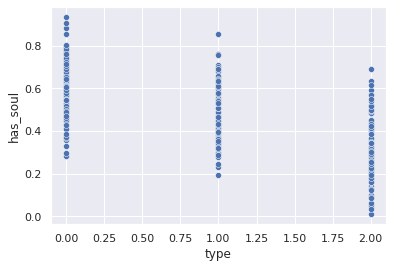

In [48]:
sns.scatterplot(data = train, x = "type", y = "has_soul");

In [49]:
# train["has_soul_class"] = train["has_soul"]
# train.loc[train["has_soul"] < 0.2 , "has_soul_class"] = 0
# train.loc[train["has_soul"] > 0.7 , "has_soul_class"] = 2
# train.loc[(train["has_soul"] >= 0.2) & (train["has_soul"] <= 0.7), "has_soul_class"] = 1

# train["has_soul_class"].value_counts(1)

In [50]:
# test["has_soul_class"] = test["has_soul"]
# test.loc[test["has_soul"] < 0.3 , "has_soul_class"] = 0
# test.loc[test["has_soul"] > 0.7 , "has_soul_class"] = 2
# test.loc[(test["has_soul"] >= 0.3) & (test["has_soul"] <= 0.7), "has_soul_class"] = 1

# test["has_soul_class"].value_counts(1)

### color

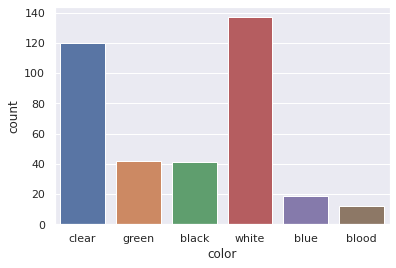

In [51]:
sns.countplot(data = train, x = "color");

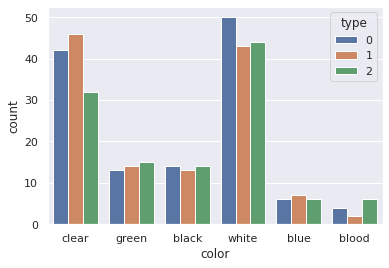

In [52]:
sns.countplot(data = train, x = "color", hue = "type");

In [53]:
train["color"].describe(include = "object")

count       371
unique        6
top       white
freq        137
Name: color, dtype: object

In [54]:
train["color"].unique()

array(['clear', 'green', 'black', 'white', 'blue', 'blood'], dtype=object)

In [55]:
train["color"].value_counts(1)

white    0.369272
clear    0.323450
green    0.113208
black    0.110512
blue     0.051213
blood    0.032345
Name: color, dtype: float64

In [56]:
train.replace('clear', 1/6, inplace=True)
train.replace('green', 2/6, inplace=True)
train.replace('black', 3/6, inplace=True)
train.replace('white', 4/6, inplace=True)
train.replace('blue', 5/6, inplace=True)
train.replace('blood', 6/6, inplace=True)

In [57]:
test.replace('clear', 1/6, inplace=True)
test.replace('green', 2/6, inplace=True)
test.replace('black', 3/6, inplace=True)
test.replace('white', 4/6, inplace=True)
test.replace('blue', 5/6, inplace=True)
test.replace('blood', 6/6, inplace=True)

## 모델링(검증용)

In [58]:
# 필요한 라이브러리 로드
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf

In [59]:
# train = pd.get_dummies(train)
# test = pd.get_dummies(test)
# train.shape, test.shape

### 훈련, 검증용 데이터 셋 만들기

In [60]:
train.columns

Index(['id', 'bone_length', 'rotting_flesh', 'hair_length', 'has_soul',
       'color', 'type'],
      dtype='object')

In [61]:
label_name = "type"
feature_names = [ 'bone_length', 'rotting_flesh', 'color', 'hair_length', 'has_soul']

X = train[feature_names]
y = train[label_name]

X.shape, y.shape

((371, 5), (371,))

In [62]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((296, 5), (75, 5), (296,), (75,))

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 192 to 102
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bone_length    296 non-null    float64
 1   rotting_flesh  296 non-null    float64
 2   color          296 non-null    float64
 3   hair_length    296 non-null    float64
 4   has_soul       296 non-null    float64
dtypes: float64(5)
memory usage: 13.9 KB


### 모델 구축

In [64]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 8, activation = "selu",input_shape = [X_train.shape[1]]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation = "selu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation = "softmax")
     ])

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 48        
                                                                 
 batch_normalization (BatchN  (None, 8)                32        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 275
Trainable params: 259
Non-trainable params: 16
_________________________________________________________

In [66]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

### 검증용 데이터 학습하기

In [67]:
class PrintDot(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: 
        print('.', end='')

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

In [68]:
history = model.fit(X_train, y_train,
                    epochs= 1000, validation_split = 0.2, verbose=0, 
                    callbacks=[PrintDot(), early_stop]
                    )

....

In [69]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
341,0.539059,0.754237,0.537854,0.7
342,0.535972,0.762712,0.537497,0.7
343,0.553770,0.762712,0.536509,0.7
344,0.555839,0.733051,0.536583,0.7
345,0.563867,0.741525,0.538614,0.7


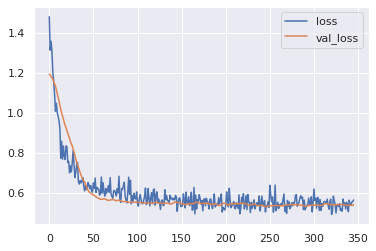

In [70]:
_ = df_hist[["loss", "val_loss"]].plot()

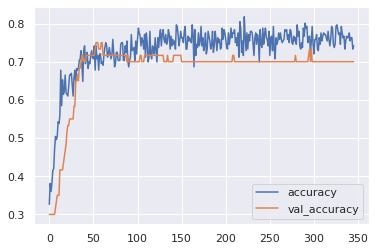

In [71]:
_ = df_hist[["accuracy", "val_accuracy"]].plot()

## 검증용 데이터 예측 및 평가

In [72]:
y_pred = model.predict(X_valid)
y_predict = np.argmax(y_pred, axis = 1)
y_predict

3/3 [==============================] - 0s 3ms/step


array([0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0,
       0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 2, 0,
       0, 0, 1, 2, 1, 1, 1, 1, 1])

In [73]:
score = (y_predict == y_valid).mean() * 100
score

68.0

## 모델링(실전)

### 데이터 셋 만들기

In [74]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]

X_train.shape, y_train.shape, X_test.shape

((371, 5), (371,), (529, 5))

### 모델 구축 및 학습하기

In [87]:
# 방법 1
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 8, activation = "selu",input_shape = [X_train.shape[1]]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation = "selu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation = "softmax")
     ])

# compile
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

# 학습하기
class PrintDot(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: 
        print('.', end='')

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X_train, y_train,
                    epochs= 1000, validation_split = 0.2, verbose=0, 
                    callbacks=[PrintDot(), early_stop]
                    )

...

In [76]:
# 방법 2
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Dense(units=64, input_shape=[input_shape]),
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dense(16, activation='relu'),
#   tf.keras.layers.Dense(3, activation='softmax')
# ])

# compile
# model.compile(optimizer='Adam', loss='categorical_crossentropy',
#               metrics=['accuracy'])

# 학습하기
# history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2)

In [77]:
# 방법 3
# X = tf.keras.layers.Input(shape=[10]) 
# H = tf.keras.layers.Dense(8, activation='swish')(X)
# H = tf.keras.layers.Dense(16, activation='swish')(X)
# y = tf.keras.layers.Dense(3, activation="softmax")(H) 
# model = tf.keras.models.Model(X,y)

# compile
# model.compile(loss="categorical_crossentropy", metrics="accuracy")

# 학습하기
# history = model.fit(X_train, y_train, epochs=2000, verbose=0)

In [78]:
# 방법 4
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(units = 128, input_shape = [X_train.shape[1]]),
#     tf.keras.layers.Dense(256, activation = "gelu"),
#     tf.keras.layers.Dense(128, activation = "gelu"),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(3, activation = "softmax")
#      ])

# compile
# model.compile(optimizer = 'adam', loss="categorical_crossentropy", metrics="accuracy")

# 학습하기
# history = model.fit(X_train, y_train, epochs=1000, vadlidation_split = 0.2,
#                     callbacks = [PrintDot(), early_stop], verbose=0)

### 학습 결과 확인하기

In [88]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
254,0.540532,0.733108,0.631062,0.720000
255,0.570770,0.729730,0.625034,0.720000
256,0.545940,0.750000,0.632286,0.720000
257,0.573942,0.719595,0.638504,0.706667
258,0.608869,0.726351,0.638191,0.706667


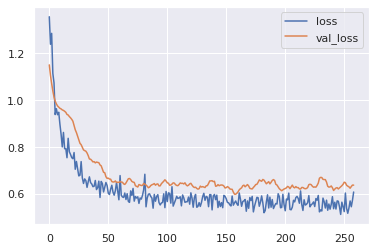

In [89]:
_ = df_hist[["loss", "val_loss"]].plot()

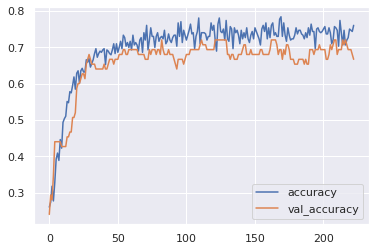

In [81]:
_ = df_hist[["accuracy", "val_accuracy"]].plot()

In [82]:
y_pred = model.predict(X_test)
y_predict = np.argmax(y_pred, axis = 1)
y_predict

17/17 [==============================] - 0s 5ms/step


array([0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0,
       0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0,
       1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0, 2, 0, 1,
       1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 1,
       0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0,

In [83]:
y_predict.shape

(529,)

## 제출하기

In [84]:
submission["type"] = y_predict
submission.head()

,id,type
0,3,0
1,6,1
2,9,0
3,10,2
4,13,2


In [85]:
submission["type"].replace(0, "Ghoul", inplace = True)
submission["type"].replace(1, "Goblin", inplace = True)
submission["type"].replace(2, "Ghost", inplace = True)

submission.head()

,id,type
0,3,Ghoul
1,6,Goblin
2,9,Ghoul
3,10,Ghost
4,13,Ghost


In [86]:
submission.to_csv(f"data/submission_tf_{score}.csv", index = False)

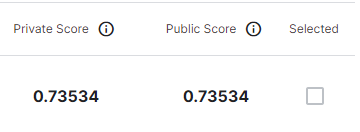